<a href="https://colab.research.google.com/github/PriyankaShardul/DataScience/blob/main/Text_Processing_Feature_Extraction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [10]:
#!python -m spacy download en_core_web_md

In [11]:
import pandas
book=pd.read_csv("/content/apple.txt",error_bad_lines=False)

In [12]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a iphone possession. Got it in 50k in ...
2,Best mobile under 60k. I just love it's batter...
3,Pros:1. Light weight and super fast response t...
4,I am very upset about the product as I checked...
5,Reason for 1 star is I got an defective piece....
6,Got the Apple iphone 13 on amazon discount sal...
7,White line coming on screen in just three mont...
8,"Bought this product recently on 5 April, was w..."
9,"Hi, Think thousand time before buying. One cal..."


In [13]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best mobile",
 "Finally a iphone possession. Got it in 50k in Diwali sale. Technically good mobile.Good News.luxury product, good battery life, reliable machine (other mobiles crash and become defunct in 3-5 years), security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from operating system - very less space in ram , apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), huge compatibility issue. you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent ! Marketing strategy for Indian market, if at all has been planned, has been very bad. If these critical issues (and a few more not mentioned here) are handled properly, the iphone can sweep away other mobiles in India. P

In [14]:
# Joining the list into one string/text
text = ' '.join(book)
text

"It's amazing..... battery last around 10 -12 hrs.....best mobile Finally a iphone possession. Got it in 50k in Diwali sale. Technically good mobile.Good News.luxury product, good battery life, reliable machine (other mobiles crash and become defunct in 3-5 years), security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from operating system - very less space in ram , apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), huge compatibility issue. you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent ! Marketing strategy for Indian market, if at all has been planned, has been very bad. If these critical issues (and a few more not mentioned here) are handled properly, the iphone can sweep away other mobiles in India. Presen

In [15]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Its amazing battery last around 10 12 hrsbest mobile Finally a iphone possession Got it in 50k in Diwali sale Technically good mobileGood Newsluxury product good battery life reliable machine other mobiles crash and become defunct in 35 years security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from operating system  very less space in ram  apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  huge compatibility issue you cant connect it to your TV the ports are different and again theres no clarity  customer support manuals or help section are silent  Marketing strategy for Indian market if at all has been planned has been very bad If these critical issues and a few more not mentioned here are handled properly the iphone can sweep away other mobiles in India Presently it doesnt seem to be happeningOverall Verdi

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'mobile', 'Finally', 'a', 'iphone', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'mobileGood', 'Newsluxury', 'product', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'mobiles', 'crash', 'and', 'become', 'defunct', 'in', '35', 'years', 'security', 'of', 'data', 'and', 'transactions', 'much', 'better', 'Terrific', 'sense', 'of', 'possession']


In [18]:
len(text_tokens)

2583

In [19]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'mobile', 'Finally', 'iphone', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'mobileGood', 'Newsluxury', 'product', 'good', 'battery', 'life', 'reliable', 'machine', 'mobiles', 'crash', 'become', 'defunct', '35', 'years', 'security', 'data', 'transactions', 'much', 'better', 'Terrific', 'sense', 'possession']


In [20]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'mobile', 'finally', 'iphone', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'mobilegood', 'newsluxury', 'product', 'good', 'battery', 'life', 'reliable']


In [21]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['it', 'amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'mobil', 'final', 'iphon', 'possess', 'got', '50k', 'diwali', 'sale', 'technic', 'good', 'mobilegood', 'newsluxuri', 'product', 'good', 'batteri', 'life', 'reliabl', 'machin', 'mobil', 'crash', 'becom', 'defunct', '35', 'year', 'secur', 'data', 'transact', 'much', 'better', 'terrif', 'sens', 'possess']


In [22]:
#!python -m spacy download en

In [23]:
# NLP english language model of spacy library
nlp = spacy.load('en') 

In [24]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Its amazing battery last around 10 12 hrsbest mobile Finally iphone possession Got 50k Diwali sale Technically good mobileGood Newsluxury product good battery life reliable machine mobiles crash become defunct 35 years security data transactions much better Terrific sense possession


In [25]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['-PRON-', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'mobile', 'finally', 'iphone', 'possession', 'Got', '50k', 'Diwali', 'sale', 'technically', 'good', 'mobilegood', 'Newsluxury', 'product', 'good', 'battery', 'life', 'reliable']


#### Feature Extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [27]:
print(vectorizer.vocabulary_)

{'pron': 456, 'amazing': 50, 'battery': 85, 'last': 319, 'around': 68, '10': 0, '12': 3, 'hrsb': 275, 'mobile': 360, 'finally': 223, 'iphone': 298, 'possession': 439, 'got': 249, '50k': 23, 'diwali': 177, 'sale': 499, 'technically': 575, 'good': 247, 'mobilegood': 362, 'newsluxury': 382, 'product': 452, 'life': 327, 'reliable': 481, 'machine': 342, 'crash': 144, 'become': 89, 'defunct': 160, '35': 16, 'year': 641, 'security': 509, 'data': 151, 'transaction': 597, 'much': 374, 'well': 628, 'terrific': 578, 'sense': 515, 'pridebad': 446, 'news': 381, 'problem': 449, 'switch': 569, 'operating': 404, 'system': 570, 'less': 324, 'space': 543, 'ram': 466, 'app': 60, 'mostly': 369, 'pay': 418, 'unreasonably': 605, 'expensive': 206, 'free': 231, 'apps': 65, 'available': 75, 'otherwise': 410, 'google': 248, 'play': 433, 'store': 557, 'even': 194, 'angry': 55, 'bird': 94, 'cost': 142, '400': 17, 'huge': 276, 'compatibility': 135, 'issue': 301, 'can': 113, 'not': 387, 'connect': 137, 'tv': 603, '

In [28]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['amazing', 'amazingnice', 'amazon', 'amazoni', 'and', 'angry', 'another', 'answer', 'anyone', 'anything', 'app', 'appario', 'apple', 'apples', 'apprehensive', 'apps', 'april', 'arenot', 'around', 'ask', 'aspect', 'atomic', 'audio', 'authority', 'automatically', 'available', 'available3', 'avoid', 'away', 'awesome', 'awesomehowever', 'back', 'backup', 'bad', 'badit', 'battery', 'be', 'beautiful', 'beawre', 'become', 'begin', 'betterthe', 'big', 'bill', 'bird', 'bit', 'blanket', 'board', 'book', 'bother']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(X.toarray().shape)

(1571, 643)


#### Let's see how can bigrams and trigrams can be included here

In [30]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [31]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'after', 'all', 'am', 'amazon', 'an', 'and', 'any', 'apple', 'are', 'as', 'at', 'battery', 'be', 'been', 'best', 'bought', 'but', 'buying', 'can', 'cost', 'device', 'display', 'fine', 'for', 'from', 'good', 'got', 'great', 'have', 'however', 'if', 'if you', 'in', 'iphone', 'is', 'it', 'it is', 'it was', 'its', 'just', 'last', 'may', 'me', 'mobile', 'months', 'motherboard', 'much', 'my', 'need', 'no', 'not', 'now', 'of', 'of the', 'on', 'on this', 'only', 'or', 'other', 'over', 'product', 'products', 'purchase', 'quality', 'replaced', 'sale', 'screen', 'service', 'so', 'sound', 'still', 'stopped', 'stopped working', 'storage', 'that', 'the', 'then', 'they', 'this', 'to', 'to be', 'turn', 'under', 'use', 'using', 'very', 'want', 'want to', 'warranty', 'was', 'which', 'will', 'with', 'work', 'working', 'would', 'year', 'years', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 2 ... 0 1 4]
 [1 0 0 ... 0 0 5]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 1 0 0]]


#### TFidf vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '13', '2017', '50k', 'able', 'able to', 'about', 'about the', 'above', 'adding', 'after', 'after using', 'after using it', 'again', 'ahead', 'all', 'all are', 'also', 'am', 'amazing', 'amazon', 'amazon sale', 'an', 'and', 'and after', 'and it', 'and the', 'and then', 'another', 'any', 'app', 'apple', 'apple care', 'apple iphone', 'apple product', 'apple products', 'apps', 'apps which', 'apps which are', 'april', 'are', 'around', 'as', 'as it', 'asked', 'asked for', 'at', 'at all', 'automatically', 'available', 'awesome', 'back', 'backup', 'bad', 'battery', 'battery life', 'be', 'be fine', 'be ignored', 'be it', 'be it the', 'been', 'being', 'best', 'best mobile', 'better', 'board', 'bought', 'bought it', 'bought it on', 'bought this', 'bought this iphone', 'box', 'build', 'but', 'but can', 'but can be', 'but if', 'but if you', 'button', 'buy', 'buying', 'by', 'can', 'can be', 'can be ignored', 'can get', 'cannot', 'cannot play', 'care', 'carry', 'center', 'centre', 'centre and',

####  Generate wordcloud

In [33]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

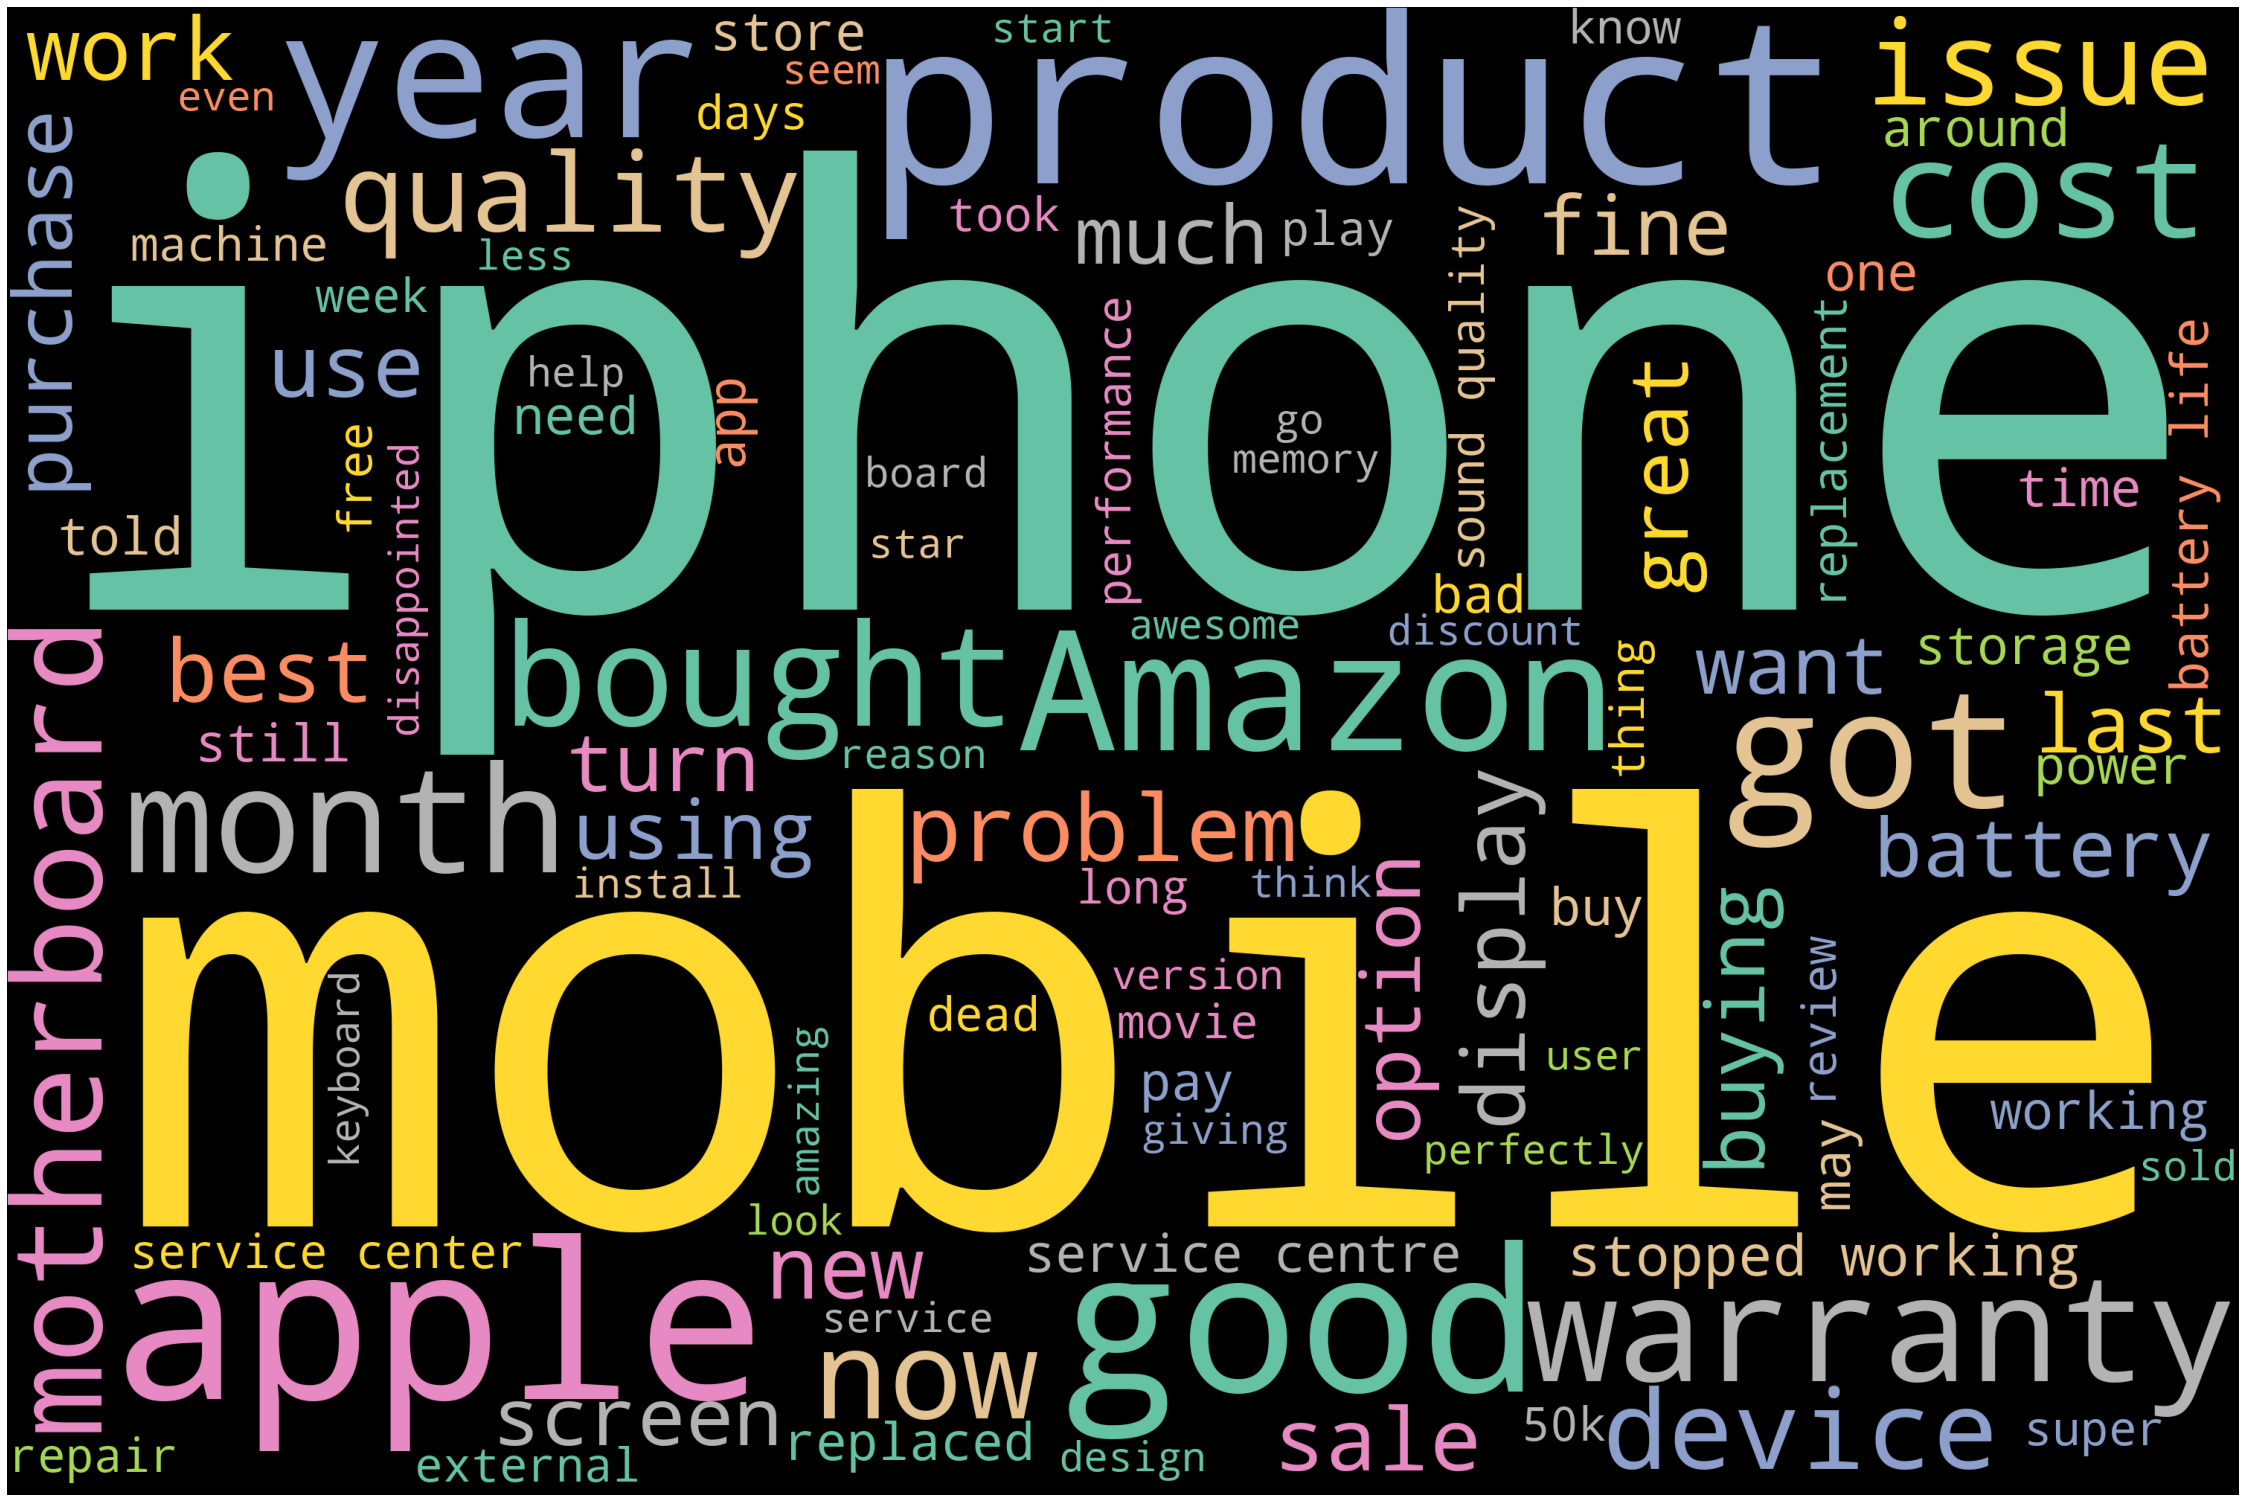

In [34]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [35]:
# Save image
#wordcloud.to_file("wordcloud.png")